In [182]:
#This case is about a bank (Thera Bank) which has a growing customer base. 
#Majority of these customers are liability customers (depositors) with varying size of deposits. 
#The number of customers who are also borrowers (asset customers) is quite small, 
#and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, 
#earn more through the interest on loans. 
#In particular, the management wants to explore ways of converting its liability customers to personal loan customers 
#(while retaining them as depositors). 
#A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. 
#This has encouraged the retail marketing department to devise campaigns with better target marketing 
#to increase the success ratio with minimal budget. 
#The department wants to build a model that will help them identify 
#the potential customers who have higher probability of purchasing the loan. 
#This will increase the success ratio while at the same time reduce the cost of the campaign. 
#The file Bank.xls contains data on 5000 customers. 
#The data include customer demographic information (age, income, etc.), 
#the customer's relationship with the bank (mortgage, securities account, etc.), 
#and the customer response to the last personal loan campaign (Personal Loan). 
#Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.
#The points distribution for this case is as follows:

#1. Data pre-processing - Understand the data and treat missing values, outliers (7.5 points)

#2. Understanding the attributes - Find relationship between different attributes (Independent variables) 
#and choose carefully which all attributes have to be a part of the analysis and why (2.5 points)

#3. Model the data using Logistic regression (2.5 points)

#4. Find the accuracy of the model using confusion matrix (2.5 points)

#5. Use K - NN model [Hint: Try different values of k] and compare the accuracy of this model 
#with that of Logistic regression (10 points)

In [183]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [184]:
import numpy as np

In [218]:
import pandas as pd

from sklearn.model_selection import train_test_split
from scipy.stats import chisquare,chi2_contingency

In [186]:
from sklearn.neighbors import KNeighborsClassifier

In [187]:
from scipy.stats import zscore

In [188]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [189]:
# A small function to compare predicted values with actual and count how many are correct
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x] is predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0


In [292]:
NNH = KNeighborsClassifier(n_neighbors= 2)

In [191]:
#load the excel
thera_df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name='Bank_Personal_Loan_Modelling')
thera_df.head()

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4.0,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3.0,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1.0,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1.0,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4.0,1.0,2,0,0,0,0,0,1


In [192]:
thera_df.shape

(5000, 14)

In [193]:
#Renaming columns to make it easier to reference
thera_df.columns = ['ID', 'Age','Exp','Inc','ZIP','Fmem','Ccavg','Edu','Mort','Ploan','Sacc','Cacc','Online','CC']

In [194]:
#check the column types
thera_df.dtypes
#No missing columns here

ID          int64
Age         int64
Exp         int64
Inc         int64
ZIP         int64
Fmem      float64
Ccavg     float64
Edu         int64
Mort        int64
Ploan       int64
Sacc        int64
Cacc        int64
Online      int64
CC          int64
dtype: object

In [195]:
# Replace the numbers in categorical variable education with the actual education levels in the origin col
thera_df['Edu'] = thera_df['Edu'].replace({1: 'Undergrad', 2: 'Graduate', 3: 'Advanced'})
# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
# This is also kown as one hot coding. The column names will be education levels... with one hot coding
thera_df = pd.get_dummies(thera_df, columns=['Edu'])

In [196]:
#check the dataframe
thera_df.head()

,ID,Age,Exp,Inc,ZIP,Fmem,Ccavg,Mort,Ploan,Sacc,Cacc,Online,CC,Edu_Advanced,Edu_Graduate,Edu_Undergrad
0,1,25,1,49,91107,4.0,1.6,0,0,1,0,0,0,0,0,1
1,2,45,19,34,90089,3.0,1.5,0,0,1,0,0,0,0,0,1
2,3,39,15,11,94720,1.0,1.0,0,0,0,0,0,0,0,0,1
3,4,35,9,100,94112,1.0,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4.0,1.0,0,0,0,0,0,1,0,1,0


In [197]:
#remove unwanted variables of Zip and ID as they will have no significance. ID seems to be continuous so no data is lost.
thera_df = thera_df.drop('ID', axis=1)

In [198]:
thera_df.head()

,Age,Exp,Inc,ZIP,Fmem,Ccavg,Mort,Ploan,Sacc,Cacc,Online,CC,Edu_Advanced,Edu_Graduate,Edu_Undergrad
0,25,1,49,91107,4.0,1.6,0,0,1,0,0,0,0,0,1
1,45,19,34,90089,3.0,1.5,0,0,1,0,0,0,0,0,1
2,39,15,11,94720,1.0,1.0,0,0,0,0,0,0,0,0,1
3,35,9,100,94112,1.0,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,91330,4.0,1.0,0,0,0,0,0,1,0,1,0


In [199]:
thera_df = thera_df.drop('ZIP', axis=1)
thera_df.head()

,Age,Exp,Inc,Fmem,Ccavg,Mort,Ploan,Sacc,Cacc,Online,CC,Edu_Advanced,Edu_Graduate,Edu_Undergrad
0,25,1,49,4.0,1.6,0,0,1,0,0,0,0,0,1
1,45,19,34,3.0,1.5,0,0,1,0,0,0,0,0,1
2,39,15,11,1.0,1.0,0,0,0,0,0,0,0,0,1
3,35,9,100,1.0,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,4.0,1.0,0,0,0,0,0,1,0,1,0


In [200]:
#Check the pattern of the various columns for missing values
thera_df.describe().transpose()
#Looks like missing values in Family members
#Looks like wrong values in experience -3 etc
#looks like Mort is heavily skewed

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Exp,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Inc,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Fmem,4982.0,2.397230,1.147160,1.0,1.0,2.0,3.0,4.0
Ccavg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mort,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Ploan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Sacc,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
Cacc,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0


/usr/local/anaconda/python3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/anaconda/python3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


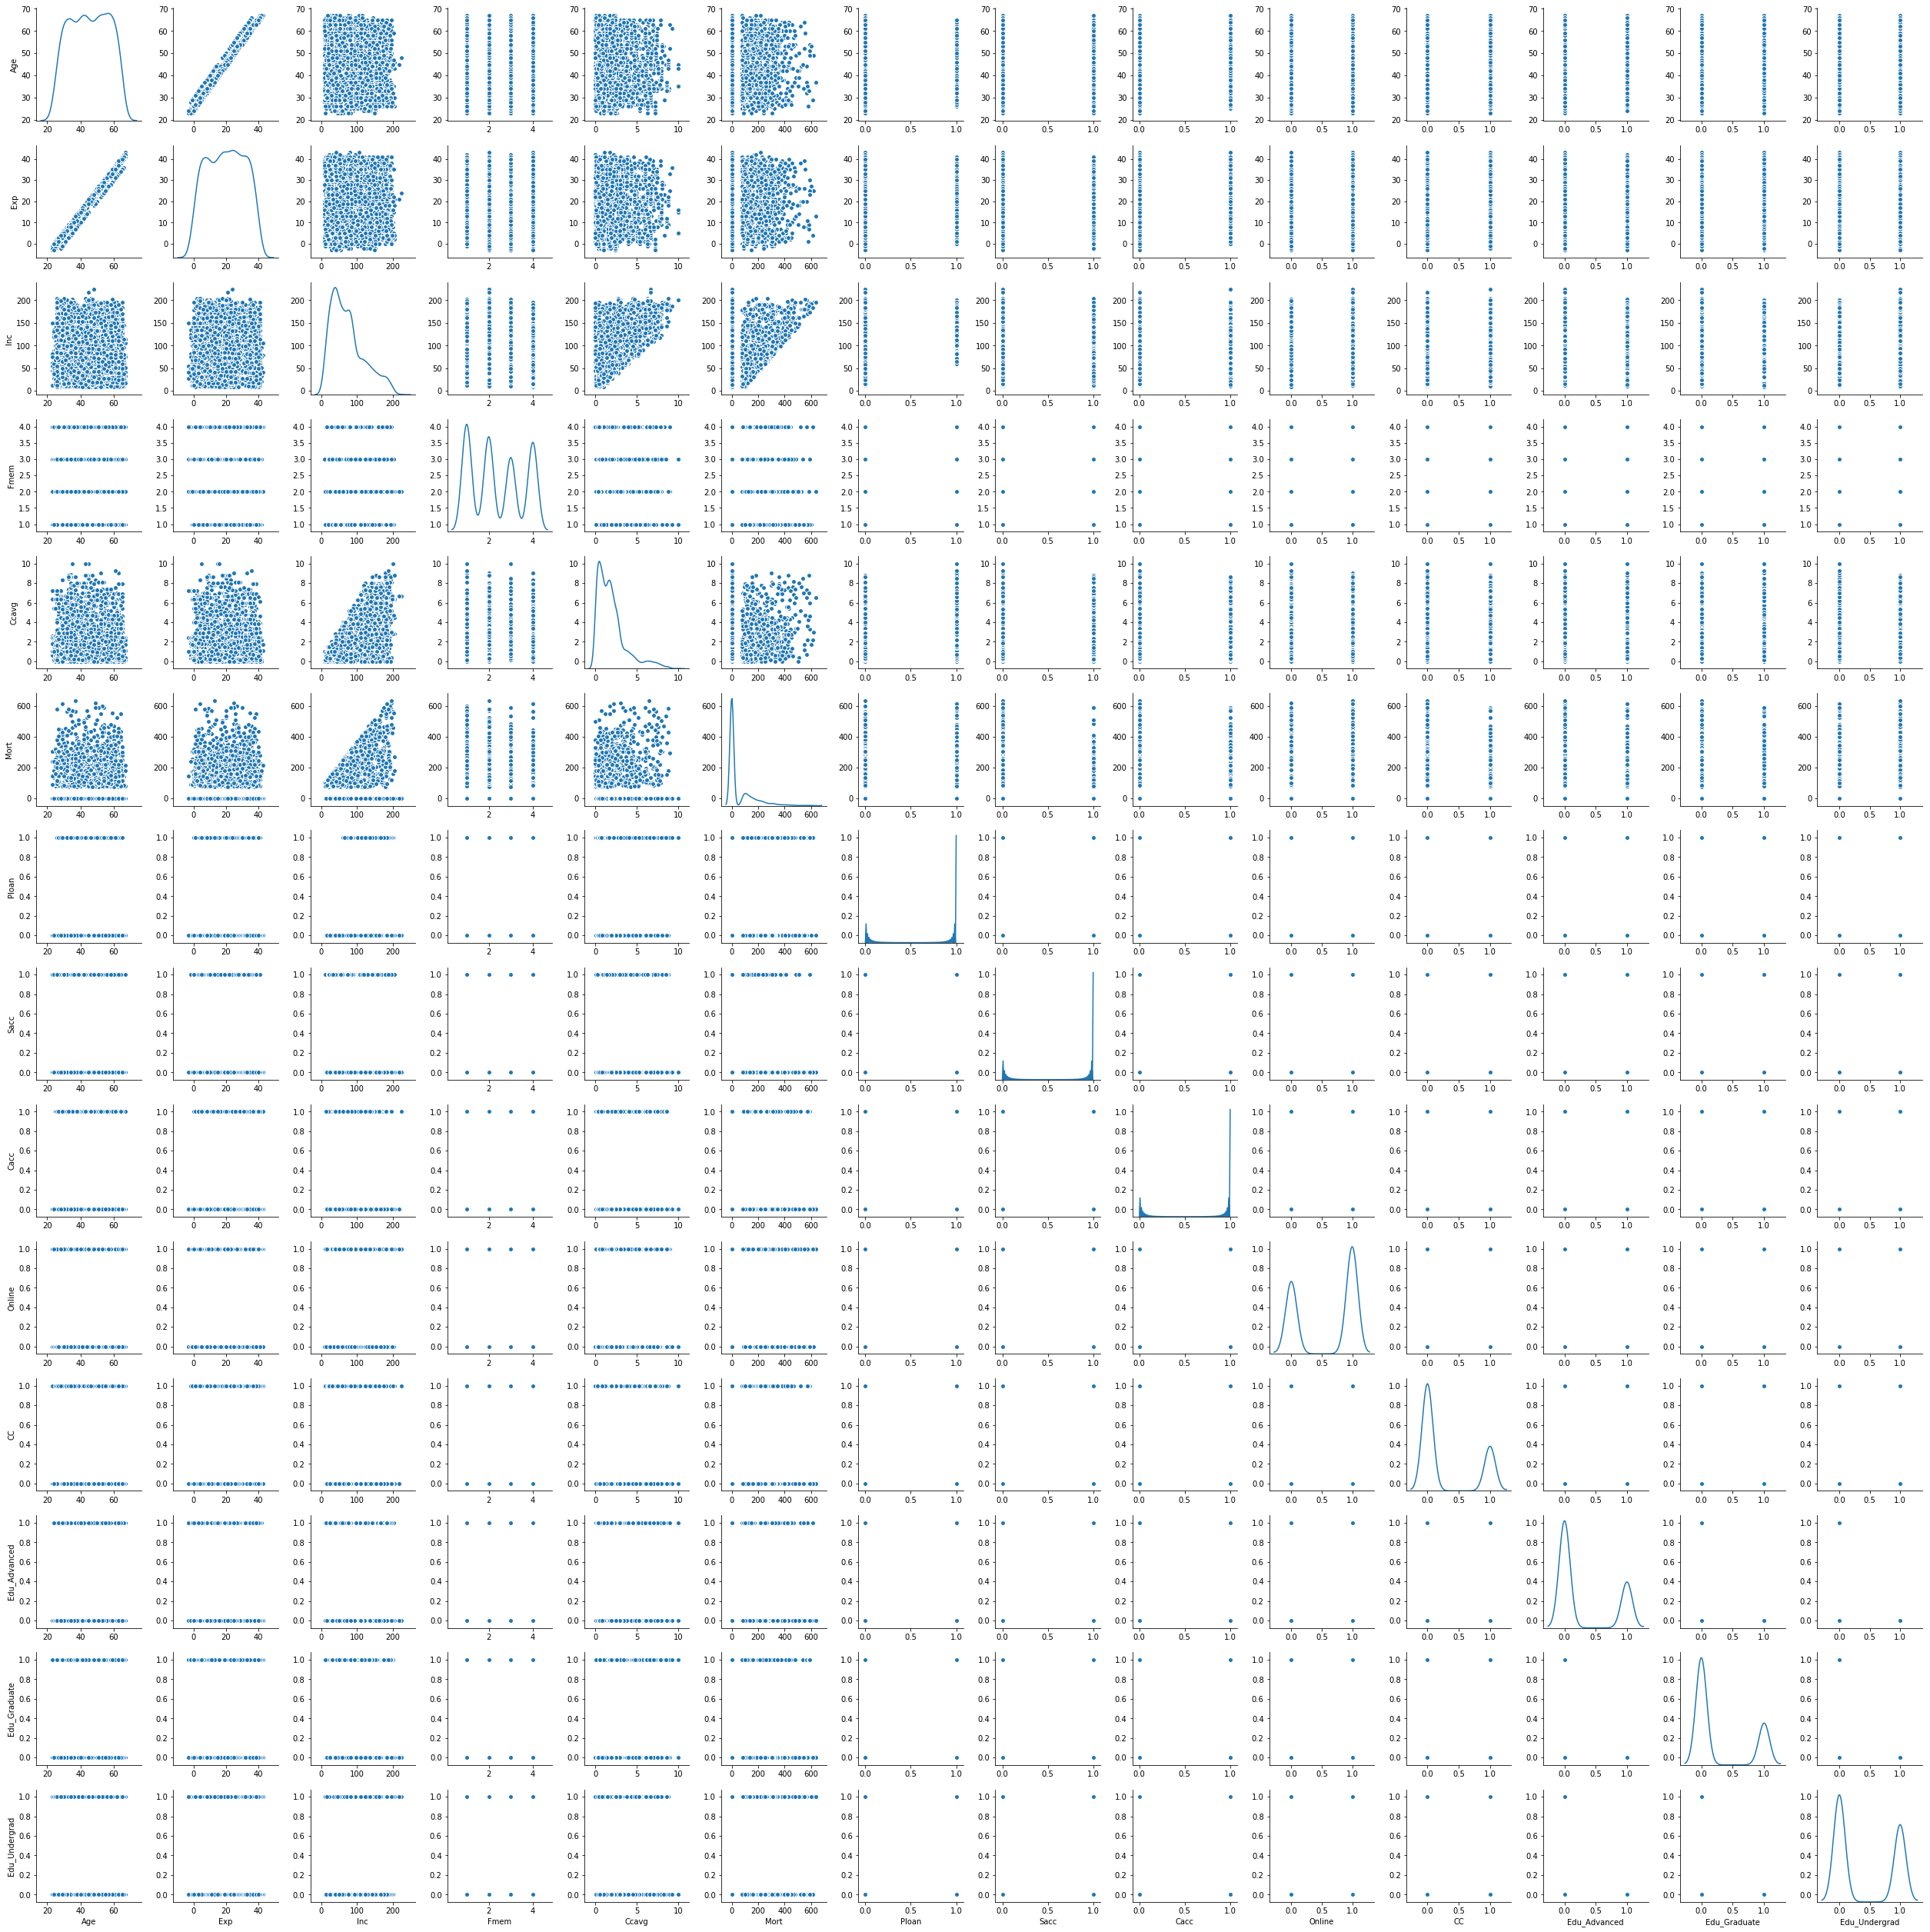

In [20]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view 

thera_df_attr = thera_df.iloc[:, 0:14]

#axes = pd.plotting.scatter_matrix(mpg_df_attr)
#plt.tight_layout()
#plt.savefig('d:\greatlakes\mpg_pairpanel.png')

sns.pairplot(thera_df_attr, diag_kind='kde')   # to plot density curve instead of histogram

#sns.pairplot(mpg_df_attr)  # to plot histogram, the default

In [201]:
thera_df.isnull().sum()
#18 null rows in Family members. Lets fill it with the median

Age               0
Exp               0
Inc               0
Fmem             18
Ccavg             0
Mort              0
Ploan             0
Sacc              0
Cacc              0
Online            0
CC                0
Edu_Advanced      0
Edu_Graduate      0
Edu_Undergrad     0
dtype: int64

In [202]:
thera_df = thera_df.apply(lambda x: x.fillna(x.median()),axis=0)

In [203]:
thera_df.isnull().sum()
#no more missing values

Age              0
Exp              0
Inc              0
Fmem             0
Ccavg            0
Mort             0
Ploan            0
Sacc             0
Cacc             0
Online           0
CC               0
Edu_Advanced     0
Edu_Graduate     0
Edu_Undergrad    0
dtype: int64

In [204]:
thera_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Exp,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Inc,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Fmem,5000.0,2.395800,1.145340,1.0,1.0,2.0,3.0,4.0
Ccavg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mort,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Ploan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Sacc,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
Cacc,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0


In [205]:
#Cleaning up the exp so that all negative exp values are now 0
thera_df.Exp[thera_df.Exp < 0] = 0

/usr/local/anaconda/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [206]:
thera_df.describe().transpose()
#negative values have been removed from Exp as Exp cannot be negative

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Exp,5000.0,20.119600,11.440484,0.0,10.0,20.0,30.0,43.0
Inc,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Fmem,5000.0,2.395800,1.145340,1.0,1.0,2.0,3.0,4.0
Ccavg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mort,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Ploan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Sacc,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
Cacc,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0


In [207]:
#removing outliers with a function
#We will not consider the categorical variables PerLoan, SecAcc, CDAcc, Online, CC, Edu_Advanced, Edu_Graduate, Edu_Undergrad
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    #df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)] = ""
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out 

In [208]:
#Marking outliers function
def mark_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    #df.loc[df['First Season'] > 1990, 'First Season'] = 1
    df_in.loc[((df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)),col_name] = np.nan
    return df_in[col_name]

In [209]:
t1 = thera_df.copy()
t2 = thera_df.copy()
thera_bak=thera_df.copy()
thera_bak1=thera_bak.copy()

In [210]:
#Get the outliers
#t2.Inc = mark_outlier(t1, 'Inc')
t1 = t1.mask(t1.sub(t1.mean()).div(t1.std()).abs().gt(2))
#thera_df.describe().transpose()

In [211]:
#Mark outliers in the DF
#t2.Mort=mark_outlier(t1,'Mort').copy()
#mark_outlier(thera_df,'Exp')
#mark_outlier(thera_df,'Inc')
#mark_outlier(thera_df,'FamMem')
#mark_outlier(thera_df,'CCAvg')

In [212]:
#Reinstate all the categorical variable values from the original df
t1.Ploan = thera_df.Ploan
t1.Sacc = thera_df.Sacc
t1.Cacc = thera_df.Cacc
print(t1.isnull().sum())
print(t1.shape[0])

Age                0
Exp                0
Inc              276
Fmem               0
Ccavg            301
Mort             276
Ploan              0
Sacc               0
Cacc               0
Online             0
CC                 0
Edu_Advanced       0
Edu_Graduate       0
Edu_Undergrad      0
dtype: int64
5000


In [213]:
#Now cleaning the df of outliers but which are not Ploan = 1 rows
#Making a copy just in case :D
t2=t1.copy()
t2 = t2.drop(t2[(t2["Ploan"] != 1) & (t2.Ccavg.isnull() | t2.Inc.isnull() | t2.Mort.isnull())].index)
#t2[(t2["Ploan"] != 1) & (t2.Ccavg.isnull() | t2.Inc.isnull() | t2.Mort.isnull())]

In [214]:
#Fill in with median value where the remainin NaNs are
t2 = t2.apply(lambda x: x.fillna(x.median()),axis=0)

In [215]:
print(t2.isnull().sum())
print(t2.shape[0])

Age              0
Exp              0
Inc              0
Fmem             0
Ccavg            0
Mort             0
Ploan            0
Sacc             0
Cacc             0
Online           0
CC               0
Edu_Advanced     0
Edu_Graduate     0
Edu_Undergrad    0
dtype: int64
4594


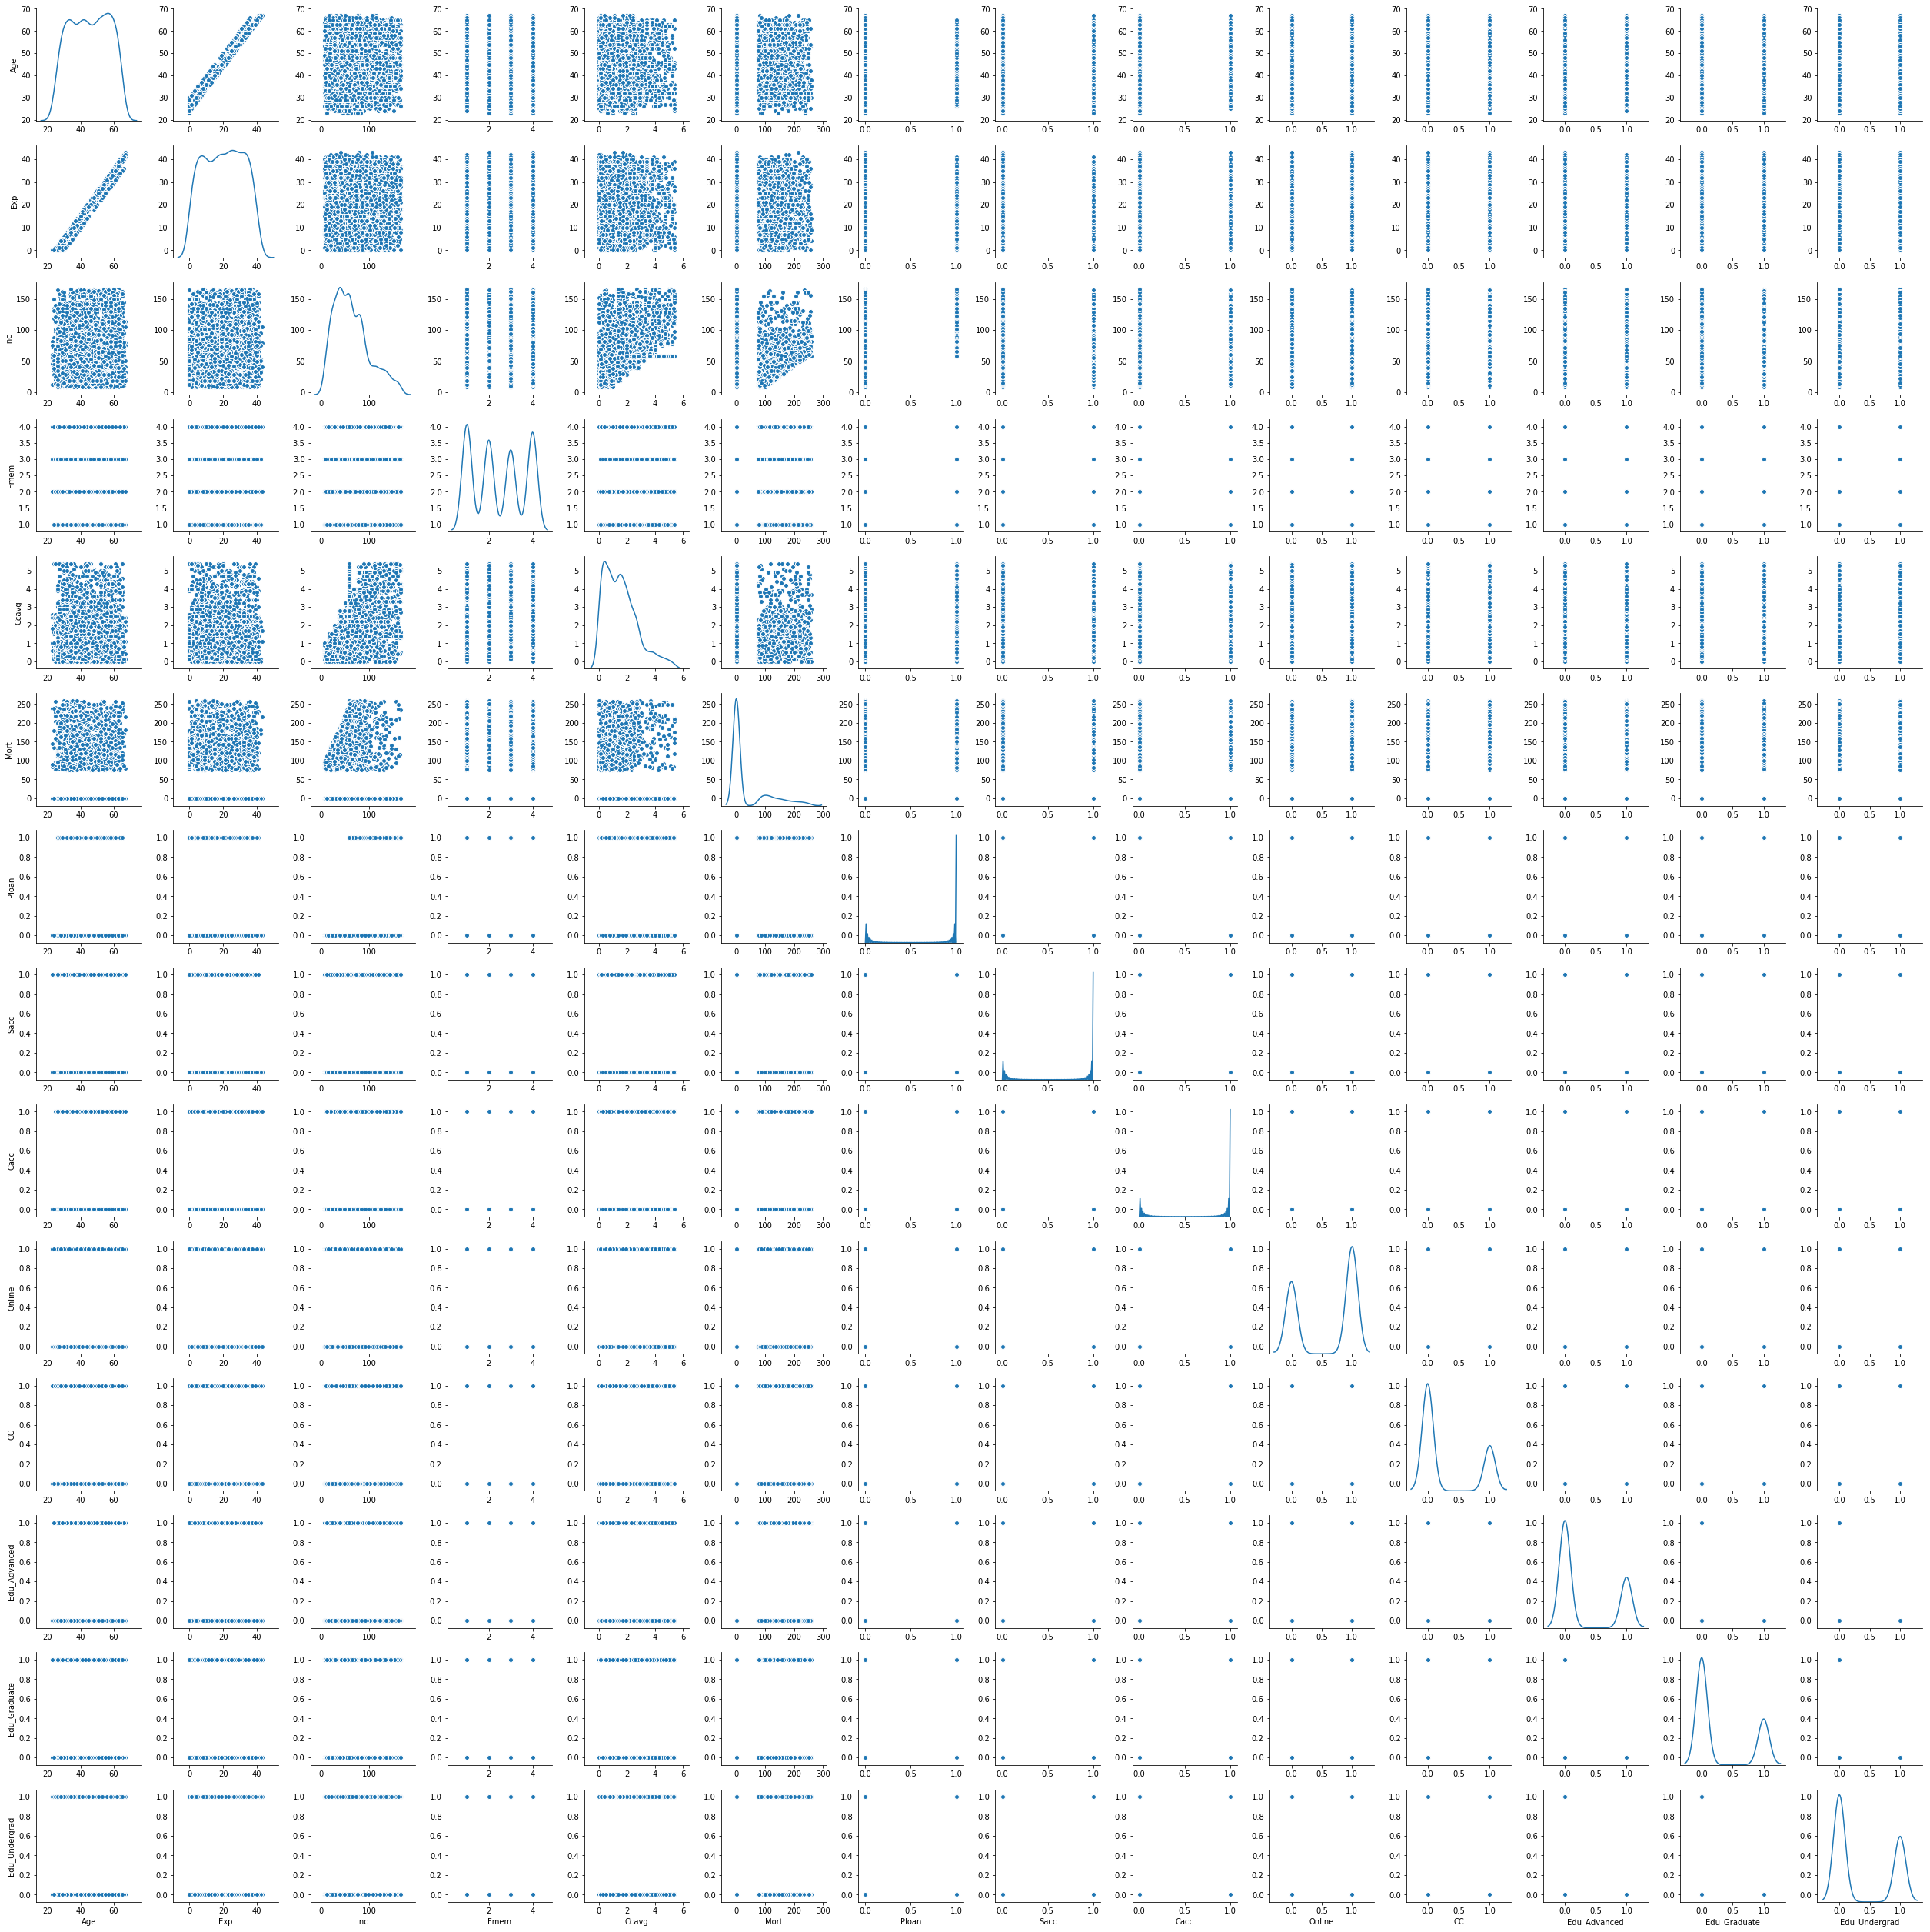

In [81]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view 

t2_attr = t2.iloc[:, 0:14]

#axes = pd.plotting.scatter_matrix(mpg_df_attr)
#plt.tight_layout()
#plt.savefig('d:\greatlakes\mpg_pairpanel.png')

sns.pairplot(t2_attr, diag_kind='kde')   # to plot density curve instead of histogram

#sns.pairplot(mpg_df_attr)  # to plot histogram, the default

In [217]:
corr = t2.corr()
corr.style.background_gradient()

,Age,Exp,Inc,Fmem,Ccavg,Mort,Ploan,Sacc,Cacc,Online,CC,Edu_Advanced,Edu_Graduate,Edu_Undergrad
Age,1,0.994068,-0.0372803,-0.0509007,-0.0321852,-0.0075069,-0.0120418,0.00605914,0.00959569,0.0142499,0.0100169,0.0413238,-0.0212426,-0.0196881
Exp,0.994068,1,-0.0300533,-0.0556388,-0.03455,-0.00720812,-0.0114258,0.00528576,0.0116831,0.0144377,0.0114975,0.0170769,-0.022002,0.00434773
Inc,-0.0372803,-0.0300533,1,-0.102171,0.487471,-0.058688,0.399156,0.0124247,0.117815,0.00111529,0.00779417,-0.0717259,-0.0986458,0.162108
Fmem,-0.0509007,-0.0556388,-0.102171,1,-0.0504443,0.0151731,0.0454875,0.0193716,0.0119551,0.00823899,0.00776503,-0.0457382,0.113205,-0.0628838
Ccavg,-0.0321852,-0.03455,0.487471,-0.0504443,1,-0.0130585,0.314212,0.0196618,0.0998474,-0.0124263,-0.00434042,-0.0379501,-0.0307025,0.0654825
Mort,-0.0075069,-0.00720812,-0.058688,0.0151731,-0.0130585,1,-0.0571075,-0.0100715,-0.00182451,-0.00778544,0.00758338,0.0149731,-0.0138093,-0.00136332
Ploan,-0.0120418,-0.0114258,0.399156,0.0454875,0.314212,-0.0571075,1,0.0215952,0.329413,0.00623282,0.000916255,0.0779054,0.0592188,-0.13083
Sacc,0.00605914,0.00528576,0.0124247,0.0193716,0.0196618,-0.0100715,0.0215952,1,0.318125,0.00766823,-0.0184464,-0.0174668,0.00406133,0.0129642
Cacc,0.00959569,0.0116831,0.117815,0.0119551,0.0998474,-0.00182451,0.329413,0.318125,1,0.173937,0.270744,0.00628135,0.00610326,-0.0118028
Online,0.0142499,0.0144377,0.00111529,0.00823899,-0.0124263,-0.00778544,0.00623282,0.00766823,0.173937,1,-0.0049757,-0.0274107,0.0237511,0.00393938


In [219]:
#-------------------------------------------------------------------------------------------------
#Age and Exp seem to have a strong correlation so we can drop one of them
#The only variables which seem to have a correlation with Ploan are Inc, CC Av and CD account
#-------------------------------------------------------------------------------------------------

In [220]:
#Try to find correlation by using zscale
t2_z=t2.apply(zscore)
corr_z=t2_z.corr()
corr_z.style.background_gradient()
#We get the same variables

,Age,Exp,Inc,Fmem,Ccavg,Mort,Ploan,Sacc,Cacc,Online,CC,Edu_Advanced,Edu_Graduate,Edu_Undergrad
Age,1,0.994068,-0.0372803,-0.0509007,-0.0321852,-0.0075069,-0.0120418,0.00605914,0.00959569,0.0142499,0.0100169,0.0413238,-0.0212426,-0.0196881
Exp,0.994068,1,-0.0300533,-0.0556388,-0.03455,-0.00720812,-0.0114258,0.00528576,0.0116831,0.0144377,0.0114975,0.0170769,-0.022002,0.00434773
Inc,-0.0372803,-0.0300533,1,-0.102171,0.487471,-0.058688,0.399156,0.0124247,0.117815,0.00111529,0.00779417,-0.0717259,-0.0986458,0.162108
Fmem,-0.0509007,-0.0556388,-0.102171,1,-0.0504443,0.0151731,0.0454875,0.0193716,0.0119551,0.00823899,0.00776503,-0.0457382,0.113205,-0.0628838
Ccavg,-0.0321852,-0.03455,0.487471,-0.0504443,1,-0.0130585,0.314212,0.0196618,0.0998474,-0.0124263,-0.00434042,-0.0379501,-0.0307025,0.0654825
Mort,-0.0075069,-0.00720812,-0.058688,0.0151731,-0.0130585,1,-0.0571075,-0.0100715,-0.00182451,-0.00778544,0.00758338,0.0149731,-0.0138093,-0.00136332
Ploan,-0.0120418,-0.0114258,0.399156,0.0454875,0.314212,-0.0571075,1,0.0215952,0.329413,0.00623282,0.000916255,0.0779054,0.0592188,-0.13083
Sacc,0.00605914,0.00528576,0.0124247,0.0193716,0.0196618,-0.0100715,0.0215952,1,0.318125,0.00766823,-0.0184464,-0.0174668,0.00406133,0.0129642
Cacc,0.00959569,0.0116831,0.117815,0.0119551,0.0998474,-0.00182451,0.329413,0.318125,1,0.173937,0.270744,0.00628135,0.00610326,-0.0118028
Online,0.0142499,0.0144377,0.00111529,0.00823899,-0.0124263,-0.00778544,0.00623282,0.00766823,0.173937,1,-0.0049757,-0.0274107,0.0237511,0.00393938


In [223]:
#Goodness of fit test for a single Categorical variable

# Let	pi denote	the	proportion	in	the	ith category
# H0	:	All	pi s	are	the	same	
# Ha	:	At	least	one	pi differs	from	the	others	

chisquare(t2["Sacc"].value_counts())

#The p-value < 0.05 hence we conclude that Atleast one of the proportions differs

Power_divergenceResult(statistic=2858.8106225511538, pvalue=0.0)

In [224]:
chisquare(t2["Cacc"].value_counts())
#The p-value < 0.05 hence we conclude that Atleast one of the proportions differs

Power_divergenceResult(statistic=3542.2629516760994, pvalue=0.0)

In [225]:
chisquare(t2["Online"].value_counts())
#The p-value > 0.05 hence we conclude that Atleast one of the proportionsdoes not differ

Power_divergenceResult(statistic=173.97387897257292, pvalue=1.0029719702817892e-39)

In [226]:
chisquare(t2["CC"].value_counts())
#The p-value < 0.05 hence we conclude that Atleast one of the proportions differs

Power_divergenceResult(statistic=759.5611667392251, pvalue=3.3456237090178577e-167)

In [227]:
chisquare(t2["Edu_Advanced"].value_counts())
#The p-value < 0.05 hence we conclude that Atleast one of the proportions differs

Power_divergenceResult(statistic=591.1850239442751, pvalue=1.3840442398376015e-130)

In [228]:
chisquare(t2["Edu_Graduate"].value_counts())
#The p-value < 0.05 hence we conclude that Atleast one of the proportions differs

Power_divergenceResult(statistic=736.9612538093165, pvalue=2.744905911073494e-162)

In [229]:
chisquare(t2["Edu_Undergrad"].value_counts())
#The p-value < 0.05 hence we conclude that Atleast one of the proportions differs

Power_divergenceResult(statistic=266.2681758815847, pvalue=7.383540815111974e-60)

In [238]:
#Test the categorical variables and Ploan
cont = pd.crosstab(t2["Sacc"],
                   t2["Ploan"])
chi2_contingency(contS)
#Independant

(1.918842588578266,
 0.16598430882485804,
 1,
 array([[3679.67479321,  429.32520679],
        [ 434.32520679,   50.67479321]]))

In [241]:
#Age	Exp	Inc	Fmem	Ccavg	Mort	Ploan	Sacc	Cacc	Online	CC	Edu_Advanced	Edu_Graduate	Edu_Undergrad
#Test the categorical variables and Ploan
cont = pd.crosstab(t2["Cacc"],
                   t2["Ploan"])
chi2_contingency(cont)
#Dependant

(494.0179627307441,
 1.9035154321944096e-109,
 1,
 array([[3863.25555072,  450.74444928],
        [ 250.74444928,   29.25555072]]))

In [242]:
#Ploan	Sacc	Cacc	Online	CC	Edu_Advanced	Edu_Graduate	Edu_Undergrad
#Test the categorical variables and Ploan
cont = pd.crosstab(t2["Online"],
                   t2["Ploan"])
chi2_contingency(cont)
#Independant

(0.13933915284759224,
 0.7089388695200539,
 1,
 array([[1656.70439704,  193.29560296],
        [2457.29560296,  286.70439704]]))

In [243]:
#Ploan	Sacc	Cacc	Online	CC	Edu_Advanced	Edu_Graduate	Edu_Undergrad
#Test the categorical variables and Ploan
cont = pd.crosstab(t2["CC"],
                   t2["Ploan"])
chi2_contingency(cont)
#Dependant

(8.664882916096698e-05,
 0.9925729706694169,
 1,
 array([[2893.41184153,  337.58815847],
        [1220.58815847,  142.41184153]]))

In [246]:
#Ploan	Sacc	Cacc	Online	CC	Edu_Advanced	Edu_Graduate	Edu_Undergrad
#Test the categorical variables and Ploan
cont = pd.crosstab(t2["Edu_Advanced"],
                   t2["Ploan"])
chi2_contingency(cont)
#Dependant

(27.339119665598844,
 1.7072234829313029e-07,
 1,
 array([[2794.9050936,  326.0949064],
        [1319.0949064,  153.9050936]]))

In [247]:
#Age	Exp	Inc	Fmem	Ccavg	Mort	Ploan	Sacc	Cacc	Online	CC	Edu_Advanced	Edu_Graduate	Edu_Undergrad
#Test the categorical variables and Ploan
cont = pd.crosstab(t2["Edu_Graduate"],
                   t2["Ploan"])
chi2_contingency(cont)
#Dependant

(15.690770049793228,
 7.458726028005818e-05,
 1,
 array([[2880.87461907,  336.12538093],
        [1233.12538093,  143.87461907]]))

In [248]:
#Sacc	Cacc	Online	CC	Edu_Advanced	Edu_Graduate	Edu_Undergrad
#Test the categorical variables and Ploan
cont = pd.crosstab(t2["Edu_Undergrad"],
                   t2["Ploan"])
chi2_contingency(cont)
#Dependant

(77.75386506226099,
 1.1671466482478537e-18,
 1,
 array([[2552.22028733,  297.77971267],
        [1561.77971267,  182.22028733]]))

In [231]:
# Goodness of Fit Test between 2 categorical variables

# H0: The two categorical variables are independent
# Ha: The two categorical variables are dependent

# Creating contingency table
cont1 = pd.crosstab(t2["Sacc"],
                   t2["Cacc"])
chi2_contingency(cont1)
#The p-value < 0.05 hence we conclude that the 2 categorical variables are dependent

(460.6116049281135,
 3.538308224196999e-102,
 1,
 array([[3858.56029604,  250.43970396],
        [ 455.43970396,   29.56029604]]))

In [249]:
#Sacc	Cacc	Online	CC	Edu_Advanced	Edu_Graduate	Edu_Undergrad
#Test the categorical variables and Ploan
cont = pd.crosstab(t2["Sacc"],
                   t2["CC"])
chi2_contingency(cont)
#Independant

(1.4345433255167896,
 0.23102439414496542,
 1,
 array([[2889.89529822, 1219.10470178],
        [ 341.10470178,  143.89529822]]))

In [232]:
# Creating contingency table
cont2 = pd.crosstab(t2["Sacc"],
                   t2["Online"])
chi2_contingency(cont2)
#The p-value > 0.05 hence we conclude that the 2 categorical variables are independent

(0.221649451373294,
 0.6377859830559023,
 1,
 array([[1654.69090118, 2454.30909882],
        [ 195.30909882,  289.69090118]]))

In [235]:
# Creating contingency table
cont4 = pd.crosstab(t2["Sacc"],
                   t2["Edu_Advanced"])
chi2_contingency(cont4)
#The p-value > 0.05 hence we conclude that the 2 categorical variables are independent

(1.2824394052245363,
 0.25744596143294024,
 1,
 array([[2791.50827166, 1317.49172834],
        [ 329.49172834,  155.50827166]]))

In [236]:
# Creating contingency table
cont5 = pd.crosstab(t2["Sacc"],
                   t2["Edu_Graduate"])
chi2_contingency(cont5)
#The p-value > 0.05 hence we conclude that the 2 categorical variables are independent

(0.04967263940463405,
 0.8236338875603323,
 1,
 array([[2877.37331302, 1231.62668698],
        [ 339.62668698,  145.37331302]]))

In [272]:
# Creating contingency table
cont6 = pd.crosstab(t2["Sacc"],
                   t2["Edu_Undergrad"])
chi2_contingency(cont3)
#The p-value > 0.05 hence we conclude that the 2 categorical variables are independent

(1.2824394052245363,
 0.25744596143294024,
 1,
 array([[2791.50827166, 1317.49172834],
        [ 329.49172834,  155.50827166]]))

In [250]:
#Sacc	Cacc	Online	CC	Edu_Advanced	Edu_Graduate	Edu_Undergrad
#Test the categorical variables and Ploan
cont = pd.crosstab(t2["Cacc"],
                   t2["Online"])
chi2_contingency(cont)
#Dependant

(137.50876284100158,
 9.333049581490882e-32,
 1,
 array([[1737.24423161, 2576.75576839],
        [ 112.75576839,  167.24423161]]))

In [251]:
#Sacc	Cacc	Online	CC	Edu_Advanced	Edu_Graduate	Edu_Undergrad
#Test the categorical variables and Ploan
cont = pd.crosstab(t2["Cacc"],
                   t2["CC"])
chi2_contingency(cont)
#Dependant

(334.2787886458698,
 1.1242926360390135e-74,
 1,
 array([[3034.07357423, 1279.92642577],
        [ 196.92642577,   83.07357423]]))

In [252]:
#Sacc	Cacc	Online	CC	Edu_Advanced	Edu_Graduate	Edu_Undergrad
#Test the categorical variables and Ploan
cont = pd.crosstab(t2["Cacc"],
                   t2["Edu_Advanced"])
chi2_contingency(cont)
#Independant

(0.12936705609922627,
 0.7190892014651038,
 1,
 array([[2930.77797127, 1383.22202873],
        [ 190.22202873,   89.77797127]]))

In [253]:
#Sacc	Cacc	Online	CC	Edu_Advanced	Edu_Graduate	Edu_Undergrad
#Test the categorical variables and Ploan
cont = pd.crosstab(t2["Cacc"],
                   t2["Edu_Graduate"])
chi2_contingency(cont)
#Independant

(0.1199709926501709,
 0.7290659524731198,
 1,
 array([[3020.92686112, 1293.07313888],
        [ 196.07313888,   83.92686112]]))

In [255]:
#Sacc	Cacc	Online	CC	Edu_Advanced	Edu_Graduate	Edu_Undergrad
#Test the categorical variables and Ploan
cont = pd.crosstab(t2["Cacc"],
                   t2["Edu_Undergrad"])
chi2_contingency(cont)
#Independant

(0.5423447774841237,
 0.46146259593336536,
 1,
 array([[2676.29516761, 1637.70483239],
        [ 173.70483239,  106.29516761]]))

In [256]:
#Sacc	Cacc	Online	CC	Edu_Advanced	Edu_Graduate	Edu_Undergrad
#Test the categorical variables and Ploan
cont = pd.crosstab(t2["Online"],
                   t2["CC"])
chi2_contingency(cont)
#Independant

(0.09261075305885488,
 0.7608839960277349,
 1,
 array([[1301.12102743,  548.87897257],
        [1929.87897257,  814.12102743]]))

In [257]:
#Sacc	Cacc	Online	CC	Edu_Advanced	Edu_Graduate	Edu_Undergrad
#Test the categorical variables and Ploan
cont = pd.crosstab(t2["Online"],
                   t2["Edu_Advanced"])
chi2_contingency(cont)
#Independant

(3.3329855008639324,
 0.0679035119303483,
 1,
 array([[1256.82411842,  593.17588158],
        [1864.17588158,  879.82411842]]))

In [258]:
#Sacc	Cacc	Online	CC	Edu_Advanced	Edu_Graduate	Edu_Undergrad
#Test the categorical variables and Ploan
cont = pd.crosstab(t2["Online"],
                   t2["Edu_Graduate"])
chi2_contingency(cont)
#Independant

(2.4869153803169,
 0.11479651869075502,
 1,
 array([[1295.48323901,  554.51676099],
        [1921.51676099,  822.48323901]]))

In [259]:
#Sacc	Cacc	Online	CC	Edu_Advanced	Edu_Graduate	Edu_Undergrad
#Test the categorical variables and Ploan
cont = pd.crosstab(t2["Online"],
                   t2["Edu_Undergrad"])
chi2_contingency(cont)
#Independant

(0.055702295692858415,
 0.8134223203161713,
 1,
 array([[1147.69264258,  702.30735742],
        [1702.30735742, 1041.69264258]]))

In [260]:
#Sacc	Cacc	Online	CC	Edu_Advanced	Edu_Graduate	Edu_Undergrad
#Test the categorical variables and Ploan
cont = pd.crosstab(t2["CC"],
                   t2["Edu_Advanced"])
chi2_contingency(cont)
#Independant

(0.20397778015870804,
 0.6515290743511077,
 1,
 array([[2195.0263387, 1035.9736613],
        [ 925.9736613,  437.0263387]]))

In [261]:
#Sacc	Cacc	Online	CC	Edu_Advanced	Edu_Graduate	Edu_Undergrad
#Test the categorical variables and Ploan
cont = pd.crosstab(t2["CC"],
                   t2["Edu_Graduate"])
chi2_contingency(cont)
#Independant

(1.4437656336306741,
 0.22953094981318772,
 1,
 array([[2262.5439704,  968.4560296],
        [ 954.4560296,  408.5439704]]))

In [262]:
#Sacc	Cacc	Online	CC	Edu_Advanced	Edu_Graduate	Edu_Undergrad
#Test the categorical variables and Ploan
cont = pd.crosstab(t2["CC"],
                   t2["Edu_Undergrad"])
chi2_contingency(cont)
#Independant

(2.5663279430571304,
 0.10916085890042179,
 1,
 array([[2004.4296909, 1226.5703091],
        [ 845.5703091,  517.4296909]]))

In [263]:
#Sacc	Cacc	Online	CC	Edu_Advanced	Edu_Graduate	Edu_Undergrad
#Test the categorical variables and Ploan
cont = pd.crosstab(t2["Edu_Advanced"],
                   t2["Edu_Graduate"])
chi2_contingency(cont)
#Dependant

(925.9736865531258,
 2.2158571317532033e-203,
 1,
 array([[2185.51523727,  935.48476273],
        [1031.48476273,  441.51523727]]))

In [264]:
#Sacc	Cacc	Online	CC	Edu_Advanced	Edu_Graduate	Edu_Undergrad
#Test the categorical variables and Ploan
cont = pd.crosstab(t2["Edu_Advanced"],
                   t2["Edu_Undergrad"])
chi2_contingency(cont)
#Dependant

(1324.416525008818,
 5.587354058082479e-290,
 1,
 array([[1936.18850675, 1184.81149325],
        [ 913.81149325,  559.18850675]]))

In [265]:
#Sacc	Cacc	Online	CC	Edu_Advanced	Edu_Graduate	Edu_Undergrad
#Test the categorical variables and Ploan
cont = pd.crosstab(t2["Edu_Advanced"],
                   t2["Edu_Undergrad"])
chi2_contingency(cont)
#Dependant

(1324.416525008818,
 5.587354058082479e-290,
 1,
 array([[1936.18850675, 1184.81149325],
        [ 913.81149325,  559.18850675]]))

In [266]:
#Sacc	Cacc	Online	CC	Edu_Advanced	Edu_Graduate	Edu_Undergrad
#Test the categorical variables and Ploan
cont = pd.crosstab(t2["Edu_Graduate"],
                   t2["Edu_Undergrad"])
chi2_contingency(cont)
#Dependant

(1201.0035643195474,
 3.691447432313353e-263,
 1,
 array([[1995.74444928, 1221.25555072],
        [ 854.25555072,  522.74444928]]))

In [ ]:
#------------------------------------------------------------------------------------------------------------
#Use Inc, CCAvg, Cacc, Sacc, Online, CC, Edu_Advanced as the attributes as they are all independant and 
#have a decent correlation with the Ploan
#------------------------------------------------------------------------------------------------------------

In [275]:
#Age	Exp	Inc	Fmem	Ccavg	Mort	Ploan	Sacc	Cacc	Online	CC	Edu_Advanced	Edu_Graduate	Edu_Undergrad
#Logistic Regression
t2_vals = t2.values
#np.hstack((my_data, new_col))
#X = t2_vals[:,[2,4,8]] # select all rows and Inc, CC Av and CD account which are the attributes
X = t2_vals[:,[2,4,7,8,9,10,11,12,13]] # select all rows and Inc, CC Av and CD account which are the attributes
Y = t2_vals[:,6]   # select all rows and the 6th column which is the Ploan
Y
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)
X_test.shape

(1379, 9)

In [276]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9405366207396664
[[1219   16]
 [  66   78]]


In [277]:
#Improve the model
from sklearn import preprocessing

# scale all the columns. This will produce a numpy array
#pima_df_scaled = preprocessing.scale(pima_df[0:7])
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [278]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)
model_score = model.score(X_test_scaled, y_test)
print(model_score)


# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_predict))

0.9412617839013778
[[1223   12]
 [  69   75]]


In [279]:
#KNN Analysis

In [291]:
t2.dtypes

Age                 int64
Exp                 int64
Inc               float64
Fmem              float64
Ccavg             float64
Mort              float64
Ploan            category
Sacc                int64
Cacc                int64
Online              int64
CC                  int64
Edu_Advanced        uint8
Edu_Graduate        uint8
Edu_Undergrad       uint8
dtype: object

In [280]:
# Create a separate dataframe consisting only of the features i.e independent attributes
#Age	Exp	Inc	Fmem	Ccavg	Mort	Ploan	Sacc	Cacc	Online	CC	Edu_Advanced	Edu_Graduate	Edu_Undergrad
t2_feature_df = t2[['Inc','Ccavg','Sacc','Cacc','Online','CC','Edu_Advanced']]
t2_feature_df.head()

,Inc,Ccavg,Sacc,Cacc,Online,CC,Edu_Advanced
0,49.0,1.6,1,0,0,0,0
1,34.0,1.5,1,0,0,0,0
2,11.0,1.0,0,0,0,0,0
3,100.0,2.7,0,0,0,0,0
4,45.0,1.0,0,0,0,1,0


In [281]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

t2_feature_df_z = t2_feature_df.apply(zscore)  # convert all attributes to Z scale 

t2_feature_df_z.describe()

,Inc,Ccavg,Sacc,Cacc,Online,CC,Edu_Advanced
count,4.594000e+03,4.594000e+03,4.594000e+03,4.594000e+03,4.594000e+03,4.594000e+03,4.594000e+03
mean,2.085595e-17,1.451700e-16,-7.287500e-16,1.499309e-16,-2.711516e-17,-1.549576e-16,1.040623e-15
std,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00
min,-1.544005e+00,-1.333088e+00,-3.435602e-01,-2.547645e-01,-1.217885e+00,-6.495004e-01,-6.869964e-01
25%,-7.137482e-01,-8.275118e-01,-3.435602e-01,-2.547645e-01,-1.217885e+00,-6.495004e-01,-6.869964e-01
50%,-1.602439e-01,-1.534099e-01,-3.435602e-01,-2.547645e-01,8.210958e-01,-6.495004e-01,-6.869964e-01
75%,5.316364e-01,5.206920e-01,-3.435602e-01,-2.547645e-01,8.210958e-01,1.539645e+00,1.455612e+00
max,2.801004e+00,3.217100e+00,2.910698e+00,3.925193e+00,8.210958e-01,1.539645e+00,1.455612e+00


In [282]:
# Capture the class values from the 'diagnosis' column into a pandas series akin to array 
t2['Ploan'] = t2.Ploan.astype('category')
t2_labels = t2["Ploan"]


In [293]:
# store the normalized features data into np array 

X = np.array(t2_feature_df_z)
X.shape

(4594, 7)

In [294]:
# store the bc_labels data into a separate np array

Y = np.array(t2_labels)
Y.shape

(4594,)

In [295]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
Y_test.shape

(1379,)

In [296]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [299]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
predicted_labels.shape

(1379,)

In [300]:
# get the accuracy score which is how many test cases were correctly predicted as a ratio of total number of test cases

accuracy_score = getAccuracy(Y_test, predicted_labels)

In [301]:
print(accuracy_score)

0.0


In [302]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print(metrics.confusion_matrix(Y_test, predicted_labels))

[[1194   15]
 [  85   85]]
